In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import gym
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

# We use keras-rl2 a reinforcement learning package that builds on top of keras and openAI gym (pip install keras-rl2) 
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
import LunarEirLander
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

In [5]:
# Get the environment and extract the number of actions.
# env = gym.make(ENV_NAME)
# np.random.seed(0)
# env.seed(0)
env = LunarEirLander.LunarEirLander()
nb_actions = env.action_space.n

In [6]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape)) # Neat approach to making model inputs match environment state
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(nb_actions, activation = 'linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 11,620
Trainable params: 11,620
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
memory = SequentialMemory(limit=50000, window_length=1)
policy = EpsGreedyQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=30,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [13]:
weights_filename = f'dqn_lunar_weights.h5f'
checkpoint_weights_filename = 'dqn_lunar_weights_{step}.h5f'
log_filename = f'dqn_lunar_log.json'
callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000)]
callbacks += [FileLogger(log_filename, interval=100)]
dqn.fit(env, callbacks=callbacks, nb_steps=100000, log_interval=500)

Training for 100000 steps ...
Interval 1 (0 steps performed)
500/500 [==============================] - 39s 78ms/step - reward: -0.6664
2 episodes - episode_reward: -172.670 [-242.043, -103.297] - loss: 12.373 - mae: 13.684 - mean_q: -14.650

Interval 2 (500 steps performed)
500/500 [==============================] - 39s 78ms/step - reward: -0.1594
Interval 3 (1000 steps performed)
500/500 [==============================] - 41s 81ms/step - reward: -0.1494
Interval 4 (1500 steps performed)
500/500 [==============================] - 51s 102ms/step - reward: -0.2232
Interval 5 (2000 steps performed)
493/500 [============================>.] - ETA: 0s - reward: -0.1765done, took 227.714 seconds


In [6]:
dqn.save_weights(weights_filename, overwrite=True)

In [9]:
dqn.test(env, nb_episodes=5, visualize=True)
env.close()

Testing for 5 episodes ...
Episode 1: reward: -324.210, steps: 110
Episode 2: reward: -311.213, steps: 91
Episode 3: reward: -126.502, steps: 63
Episode 4: reward: -73.705, steps: 74
Episode 5: reward: -215.888, steps: 143


In [10]:
history = dqn.fit(env, nb_steps=500000, visualize=False, verbose=2)
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

Training for 500000 steps ...
     82/500000: episode: 1, duration: 0.197s, episode steps:  82, steps per second: 417, episode reward: -326.599, mean reward: -3.983 [-100.000,  1.730], mean action: 1.134 [0.000, 3.000],  loss: 7.963121, mae: 16.785300, mean_q: -19.568584
    200/500000: episode: 2, duration: 0.406s, episode steps: 118, steps per second: 290, episode reward: -132.501, mean reward: -1.123 [-100.000,  2.283], mean action: 1.229 [0.000, 3.000],  loss: 11.054199, mae: 18.427864, mean_q: -21.652473
    290/500000: episode: 3, duration: 0.287s, episode steps:  90, steps per second: 314, episode reward: -172.047, mean reward: -1.912 [-100.000,  5.475], mean action: 0.133 [0.000, 3.000],  loss: 9.099948, mae: 18.190281, mean_q: -21.644831
    536/500000: episode: 4, duration: 0.821s, episode steps: 246, steps per second: 300, episode reward: -240.460, mean reward: -0.977 [-100.000, 23.062], mean action: 1.077 [0.000, 3.000],  loss: 11.023267, mae: 19.550644, mean_q: -23.711624


   5539/500000: episode: 35, duration: 0.342s, episode steps: 104, steps per second: 304, episode reward: -182.582, mean reward: -1.756 [-100.000, 10.706], mean action: 0.933 [0.000, 3.000],  loss: 15.200828, mae: 29.991343, mean_q: -37.631325
   5975/500000: episode: 36, duration: 1.559s, episode steps: 436, steps per second: 280, episode reward: 120.193, mean reward:  0.276 [-17.031, 100.000], mean action: 1.727 [0.000, 3.000],  loss: 15.517873, mae: 29.742462, mean_q: -37.085854
   6454/500000: episode: 37, duration: 1.762s, episode steps: 479, steps per second: 272, episode reward: -87.701, mean reward: -0.183 [-100.000, 19.546], mean action: 1.530 [0.000, 3.000],  loss: 11.028628, mae: 28.885895, mean_q: -36.039391
   7325/500000: episode: 38, duration: 3.381s, episode steps: 871, steps per second: 258, episode reward: -291.656, mean reward: -0.335 [-100.000, 14.591], mean action: 1.743 [0.000, 3.000],  loss: 16.469769, mae: 26.853895, mean_q: -32.953953
   8183/500000: episode: 3

  16560/500000: episode: 69, duration: 0.740s, episode steps: 212, steps per second: 286, episode reward: -430.727, mean reward: -2.032 [-100.000,  2.492], mean action: 1.396 [0.000, 3.000],  loss: 10.326934, mae: 11.911045, mean_q: -11.017550
  16624/500000: episode: 70, duration: 0.247s, episode steps:  64, steps per second: 259, episode reward: -139.595, mean reward: -2.181 [-100.000,  6.011], mean action: 1.031 [0.000, 3.000],  loss: 12.721609, mae: 10.980802, mean_q: -9.661226
  16794/500000: episode: 71, duration: 0.585s, episode steps: 170, steps per second: 290, episode reward: -404.244, mean reward: -2.378 [-100.000,  1.817], mean action: 1.724 [0.000, 3.000],  loss: 8.910123, mae: 10.784506, mean_q: -9.627635
  16975/500000: episode: 72, duration: 0.616s, episode steps: 181, steps per second: 294, episode reward: -68.021, mean reward: -0.376 [-100.000,  9.383], mean action: 1.536 [0.000, 3.000],  loss: 12.049449, mae: 11.626975, mean_q: -10.690846
  17215/500000: episode: 73,

  22916/500000: episode: 103, duration: 0.968s, episode steps: 275, steps per second: 284, episode reward: -57.672, mean reward: -0.210 [-100.000, 15.639], mean action: 1.382 [0.000, 3.000],  loss: 9.895812, mae: 14.095515, mean_q: -13.128907
  23011/500000: episode: 104, duration: 0.343s, episode steps:  95, steps per second: 277, episode reward: -74.542, mean reward: -0.785 [-100.000, 43.530], mean action: 1.358 [0.000, 3.000],  loss: 14.064901, mae: 13.097715, mean_q: -11.642967
  23257/500000: episode: 105, duration: 0.884s, episode steps: 246, steps per second: 278, episode reward: -172.336, mean reward: -0.701 [-100.000, 11.299], mean action: 1.634 [0.000, 3.000],  loss: 8.729342, mae: 13.018245, mean_q: -11.400496
  23419/500000: episode: 106, duration: 0.559s, episode steps: 162, steps per second: 290, episode reward: -177.900, mean reward: -1.098 [-100.000,  5.345], mean action: 1.167 [0.000, 3.000],  loss: 10.295568, mae: 13.408601, mean_q: -11.941586
  23641/500000: episode:

  30330/500000: episode: 137, duration: 0.925s, episode steps: 256, steps per second: 277, episode reward: -42.758, mean reward: -0.167 [-100.000, 14.712], mean action: 1.641 [0.000, 3.000],  loss: 6.960256, mae: 14.905213, mean_q: -8.533231
  30590/500000: episode: 138, duration: 0.921s, episode steps: 260, steps per second: 282, episode reward: -21.263, mean reward: -0.082 [-100.000, 18.814], mean action: 1.485 [0.000, 3.000],  loss: 7.752639, mae: 14.267570, mean_q: -7.340553
  30884/500000: episode: 139, duration: 1.062s, episode steps: 294, steps per second: 277, episode reward: -139.958, mean reward: -0.476 [-100.000,  5.759], mean action: 1.330 [0.000, 3.000],  loss: 9.600763, mae: 14.808602, mean_q: -7.423028
  31110/500000: episode: 140, duration: 0.813s, episode steps: 226, steps per second: 278, episode reward: -225.815, mean reward: -0.999 [-100.000, 20.851], mean action: 1.885 [0.000, 3.000],  loss: 8.119090, mae: 14.477385, mean_q: -6.445952
  31412/500000: episode: 141, 

  39040/500000: episode: 171, duration: 3.370s, episode steps: 873, steps per second: 259, episode reward: -198.080, mean reward: -0.227 [-100.000,  8.376], mean action: 1.829 [0.000, 3.000],  loss: 7.349049, mae: 16.740555, mean_q: 1.638568
  39440/500000: episode: 172, duration: 1.492s, episode steps: 400, steps per second: 268, episode reward: -119.381, mean reward: -0.298 [-100.000, 12.259], mean action: 1.768 [0.000, 3.000],  loss: 7.468527, mae: 17.082056, mean_q: 1.728871
  39607/500000: episode: 173, duration: 0.597s, episode steps: 167, steps per second: 280, episode reward: -29.629, mean reward: -0.177 [-100.000, 20.050], mean action: 2.006 [0.000, 3.000],  loss: 7.221805, mae: 17.167309, mean_q: 2.407713
  39776/500000: episode: 174, duration: 0.604s, episode steps: 169, steps per second: 280, episode reward: -60.635, mean reward: -0.359 [-100.000, 12.983], mean action: 1.811 [0.000, 3.000],  loss: 10.034839, mae: 17.086485, mean_q: 2.144975
  39932/500000: episode: 175, dur

  48393/500000: episode: 205, duration: 0.708s, episode steps: 192, steps per second: 271, episode reward: -134.017, mean reward: -0.698 [-100.000,  5.882], mean action: 1.880 [0.000, 3.000],  loss: 7.576789, mae: 17.853401, mean_q: 8.205998
  48792/500000: episode: 206, duration: 1.607s, episode steps: 399, steps per second: 248, episode reward:  8.798, mean reward:  0.022 [-100.000, 26.705], mean action: 1.835 [0.000, 3.000],  loss: 10.151585, mae: 18.171574, mean_q: 7.864681
  49098/500000: episode: 207, duration: 1.143s, episode steps: 306, steps per second: 268, episode reward: -21.751, mean reward: -0.071 [-100.000, 13.685], mean action: 1.977 [0.000, 3.000],  loss: 9.643100, mae: 18.207481, mean_q: 8.032268
  49271/500000: episode: 208, duration: 0.634s, episode steps: 173, steps per second: 273, episode reward: -60.957, mean reward: -0.352 [-100.000, 12.144], mean action: 1.775 [0.000, 3.000],  loss: 11.869032, mae: 18.279453, mean_q: 8.511655
  50271/500000: episode: 209, dura

  65386/500000: episode: 239, duration: 1.794s, episode steps: 449, steps per second: 250, episode reward: -78.982, mean reward: -0.176 [-100.000, 18.354], mean action: 1.450 [0.000, 3.000],  loss: 10.409628, mae: 41.187744, mean_q: 49.963337
  65593/500000: episode: 240, duration: 0.775s, episode steps: 207, steps per second: 267, episode reward: -26.991, mean reward: -0.130 [-100.000, 15.983], mean action: 1.580 [0.000, 3.000],  loss: 6.938948, mae: 41.804695, mean_q: 51.444000
  66593/500000: episode: 241, duration: 4.594s, episode steps: 1000, steps per second: 218, episode reward: -81.497, mean reward: -0.081 [-4.931,  4.876], mean action: 1.543 [0.000, 3.000],  loss: 9.306623, mae: 42.604172, mean_q: 52.752853
  66796/500000: episode: 242, duration: 0.759s, episode steps: 203, steps per second: 267, episode reward: -21.071, mean reward: -0.104 [-100.000, 16.646], mean action: 1.547 [0.000, 3.000],  loss: 9.415795, mae: 43.372421, mean_q: 54.361992
  67302/500000: episode: 243, du

  91876/500000: episode: 273, duration: 4.218s, episode steps: 1000, steps per second: 237, episode reward: -26.949, mean reward: -0.027 [-5.615,  4.525], mean action: 1.856 [0.000, 3.000],  loss: 5.140697, mae: 41.572868, mean_q: 53.361107
  92876/500000: episode: 274, duration: 5.612s, episode steps: 1000, steps per second: 178, episode reward: -32.652, mean reward: -0.033 [-5.269,  4.543], mean action: 1.769 [0.000, 3.000],  loss: 8.134213, mae: 41.382038, mean_q: 53.039093
  93876/500000: episode: 275, duration: 5.127s, episode steps: 1000, steps per second: 195, episode reward: -17.882, mean reward: -0.018 [-5.206,  4.196], mean action: 1.853 [0.000, 3.000],  loss: 6.930369, mae: 40.796459, mean_q: 52.962818
  94876/500000: episode: 276, duration: 4.815s, episode steps: 1000, steps per second: 208, episode reward: -30.994, mean reward: -0.031 [-4.583,  4.799], mean action: 1.816 [0.000, 3.000],  loss: 7.090418, mae: 40.140377, mean_q: 52.275181
  95876/500000: episode: 277, durati

 123469/500000: episode: 307, duration: 5.529s, episode steps: 1000, steps per second: 181, episode reward: -27.991, mean reward: -0.028 [-4.974,  4.893], mean action: 1.686 [0.000, 3.000],  loss: 2.113146, mae: 18.927168, mean_q: 24.485199
 124469/500000: episode: 308, duration: 4.744s, episode steps: 1000, steps per second: 211, episode reward: -56.515, mean reward: -0.057 [-4.907,  3.985], mean action: 1.701 [0.000, 3.000],  loss: 1.546476, mae: 18.377102, mean_q: 23.680477
 125469/500000: episode: 309, duration: 5.562s, episode steps: 1000, steps per second: 180, episode reward: -82.659, mean reward: -0.083 [-3.979,  3.781], mean action: 1.730 [0.000, 3.000],  loss: 1.598101, mae: 17.484318, mean_q: 22.918779
 125736/500000: episode: 310, duration: 1.015s, episode steps: 267, steps per second: 263, episode reward: -163.828, mean reward: -0.614 [-100.000,  3.714], mean action: 1.854 [0.000, 3.000],  loss: 0.945899, mae: 17.095306, mean_q: 22.377094
 126736/500000: episode: 311, dura

 155014/500000: episode: 341, duration: 2.269s, episode steps: 559, steps per second: 246, episode reward: -103.900, mean reward: -0.186 [-100.000, 11.545], mean action: 1.623 [0.000, 3.000],  loss: 0.775510, mae: 13.090877, mean_q: 16.489843
 156014/500000: episode: 342, duration: 4.126s, episode steps: 1000, steps per second: 242, episode reward: -11.454, mean reward: -0.011 [-3.421,  4.696], mean action: 1.795 [0.000, 3.000],  loss: 1.764187, mae: 13.130936, mean_q: 16.414310
 156635/500000: episode: 343, duration: 2.460s, episode steps: 621, steps per second: 252, episode reward: -123.417, mean reward: -0.199 [-100.000, 21.067], mean action: 1.676 [0.000, 3.000],  loss: 0.661014, mae: 12.952446, mean_q: 16.114143
 157252/500000: episode: 344, duration: 2.440s, episode steps: 617, steps per second: 253, episode reward: -187.548, mean reward: -0.304 [-100.000, 19.875], mean action: 1.767 [0.000, 3.000],  loss: 1.797441, mae: 12.800582, mean_q: 15.733581
 158252/500000: episode: 345, 

 184733/500000: episode: 375, duration: 4.496s, episode steps: 1000, steps per second: 222, episode reward: -54.383, mean reward: -0.054 [-4.686,  5.390], mean action: 1.567 [0.000, 3.000],  loss: 1.672996, mae: 12.608762, mean_q: 14.808332
 185433/500000: episode: 376, duration: 3.280s, episode steps: 700, steps per second: 213, episode reward: -131.118, mean reward: -0.187 [-100.000, 12.088], mean action: 1.643 [0.000, 3.000],  loss: 2.291059, mae: 12.603600, mean_q: 14.849350
 186433/500000: episode: 377, duration: 4.929s, episode steps: 1000, steps per second: 203, episode reward: -25.034, mean reward: -0.025 [-4.462,  4.778], mean action: 1.482 [0.000, 3.000],  loss: 1.968692, mae: 12.676223, mean_q: 15.118955
 187433/500000: episode: 378, duration: 4.894s, episode steps: 1000, steps per second: 204, episode reward: -66.126, mean reward: -0.066 [-4.394,  5.250], mean action: 1.478 [0.000, 3.000],  loss: 1.278437, mae: 12.684498, mean_q: 15.065818
 187588/500000: episode: 379, dura

 210174/500000: episode: 409, duration: 4.026s, episode steps: 1000, steps per second: 248, episode reward: -1.295, mean reward: -0.001 [-5.287,  5.045], mean action: 1.535 [0.000, 3.000],  loss: 3.076172, mae: 17.293058, mean_q: 21.945524
 211174/500000: episode: 410, duration: 4.239s, episode steps: 1000, steps per second: 236, episode reward: -43.082, mean reward: -0.043 [-4.731,  4.522], mean action: 1.537 [0.000, 3.000],  loss: 5.620227, mae: 17.235342, mean_q: 21.706322
 212174/500000: episode: 411, duration: 4.192s, episode steps: 1000, steps per second: 239, episode reward: -49.194, mean reward: -0.049 [-18.405, 11.404], mean action: 1.398 [0.000, 3.000],  loss: 2.793849, mae: 17.049244, mean_q: 21.670004
 212902/500000: episode: 412, duration: 3.124s, episode steps: 728, steps per second: 233, episode reward: 127.934, mean reward:  0.176 [-4.540, 100.000], mean action: 1.275 [0.000, 3.000],  loss: 3.264437, mae: 17.057383, mean_q: 21.365499
 213486/500000: episode: 413, durati

 240768/500000: episode: 443, duration: 3.218s, episode steps: 715, steps per second: 222, episode reward: 160.686, mean reward:  0.225 [-13.089, 100.000], mean action: 1.358 [0.000, 3.000],  loss: 3.826142, mae: 15.589561, mean_q: 20.106886
 241768/500000: episode: 444, duration: 5.612s, episode steps: 1000, steps per second: 178, episode reward: -12.065, mean reward: -0.012 [-4.803,  5.155], mean action: 1.585 [0.000, 3.000],  loss: 2.544282, mae: 15.563592, mean_q: 20.224792
 242768/500000: episode: 445, duration: 4.841s, episode steps: 1000, steps per second: 207, episode reward: -1.097, mean reward: -0.001 [-4.717,  5.453], mean action: 1.642 [0.000, 3.000],  loss: 3.046918, mae: 15.183323, mean_q: 19.837259
 243768/500000: episode: 446, duration: 4.518s, episode steps: 1000, steps per second: 221, episode reward: -79.542, mean reward: -0.080 [-5.132,  4.837], mean action: 1.693 [0.000, 3.000],  loss: 4.003587, mae: 14.866347, mean_q: 19.398449
 244768/500000: episode: 447, durati

 273608/500000: episode: 477, duration: 4.694s, episode steps: 977, steps per second: 208, episode reward: 156.377, mean reward:  0.160 [-18.938, 100.000], mean action: 1.254 [0.000, 3.000],  loss: 2.811951, mae: 12.712617, mean_q: 16.865797
 274523/500000: episode: 478, duration: 4.279s, episode steps: 915, steps per second: 214, episode reward: 129.449, mean reward:  0.141 [-20.444, 100.000], mean action: 1.655 [0.000, 3.000],  loss: 2.111888, mae: 12.921087, mean_q: 17.166407
 274773/500000: episode: 479, duration: 0.949s, episode steps: 250, steps per second: 263, episode reward: -181.510, mean reward: -0.726 [-100.000, 17.591], mean action: 1.736 [0.000, 3.000],  loss: 3.457007, mae: 13.151826, mean_q: 17.517763
 275528/500000: episode: 480, duration: 3.213s, episode steps: 755, steps per second: 235, episode reward: 189.821, mean reward:  0.251 [-19.327, 100.000], mean action: 1.162 [0.000, 3.000],  loss: 1.675916, mae: 13.279563, mean_q: 17.765587
 276201/500000: episode: 481, d

 282855/500000: episode: 511, duration: 0.483s, episode steps: 131, steps per second: 271, episode reward: -177.726, mean reward: -1.357 [-100.000,  7.803], mean action: 1.832 [0.000, 3.000],  loss: 5.597253, mae: 16.233988, mean_q: 21.342339
 283052/500000: episode: 512, duration: 0.728s, episode steps: 197, steps per second: 270, episode reward: -276.771, mean reward: -1.405 [-100.000, 59.469], mean action: 1.736 [0.000, 3.000],  loss: 9.571940, mae: 16.821354, mean_q: 22.100100
 283289/500000: episode: 513, duration: 0.889s, episode steps: 237, steps per second: 266, episode reward: 33.391, mean reward:  0.141 [-100.000, 11.244], mean action: 1.759 [0.000, 3.000],  loss: 10.365641, mae: 16.894941, mean_q: 21.961985
 283947/500000: episode: 514, duration: 2.682s, episode steps: 658, steps per second: 245, episode reward: 246.632, mean reward:  0.375 [-19.396, 100.000], mean action: 1.263 [0.000, 3.000],  loss: 7.717343, mae: 16.870836, mean_q: 21.944614
 284226/500000: episode: 515, 

 309065/500000: episode: 545, duration: 4.652s, episode steps: 1000, steps per second: 215, episode reward: 68.111, mean reward:  0.068 [-10.893, 10.979], mean action: 1.463 [0.000, 3.000],  loss: 5.609982, mae: 18.259171, mean_q: 21.719511
 309894/500000: episode: 546, duration: 3.511s, episode steps: 829, steps per second: 236, episode reward: 133.850, mean reward:  0.161 [-17.481, 100.000], mean action: 1.613 [0.000, 3.000],  loss: 5.646359, mae: 18.622087, mean_q: 22.495911
 310611/500000: episode: 547, duration: 3.056s, episode steps: 717, steps per second: 235, episode reward: -112.419, mean reward: -0.157 [-100.000, 13.860], mean action: 1.679 [0.000, 3.000],  loss: 6.925633, mae: 18.787813, mean_q: 22.635271
 311611/500000: episode: 548, duration: 4.500s, episode steps: 1000, steps per second: 222, episode reward: 40.325, mean reward:  0.040 [-18.966, 22.860], mean action: 1.572 [0.000, 3.000],  loss: 6.517378, mae: 18.785723, mean_q: 22.691444
 312245/500000: episode: 549, dur

 336641/500000: episode: 579, duration: 3.695s, episode steps: 847, steps per second: 229, episode reward: -169.983, mean reward: -0.201 [-100.000,  9.821], mean action: 1.488 [0.000, 3.000],  loss: 4.036169, mae: 18.424587, mean_q: 24.154737
 337641/500000: episode: 580, duration: 4.471s, episode steps: 1000, steps per second: 224, episode reward: -44.753, mean reward: -0.045 [-3.582,  5.179], mean action: 1.521 [0.000, 3.000],  loss: 3.650139, mae: 17.862366, mean_q: 23.288187
 338641/500000: episode: 581, duration: 4.476s, episode steps: 1000, steps per second: 223, episode reward: 49.076, mean reward:  0.049 [-21.300, 21.255], mean action: 1.571 [0.000, 3.000],  loss: 3.682633, mae: 17.464451, mean_q: 22.677301
 339501/500000: episode: 582, duration: 3.711s, episode steps: 860, steps per second: 232, episode reward: -148.873, mean reward: -0.173 [-100.000,  9.510], mean action: 1.633 [0.000, 3.000],  loss: 3.868889, mae: 17.128979, mean_q: 22.164303
 340501/500000: episode: 583, du

 369667/500000: episode: 613, duration: 4.427s, episode steps: 1000, steps per second: 226, episode reward: -23.358, mean reward: -0.023 [-3.996,  5.253], mean action: 1.869 [0.000, 3.000],  loss: 2.215890, mae: 13.499498, mean_q: 17.158890
 370667/500000: episode: 614, duration: 4.446s, episode steps: 1000, steps per second: 225, episode reward: 13.251, mean reward:  0.013 [-4.564,  5.202], mean action: 1.638 [0.000, 3.000],  loss: 2.157799, mae: 13.440031, mean_q: 17.000235
 371667/500000: episode: 615, duration: 4.524s, episode steps: 1000, steps per second: 221, episode reward: 28.956, mean reward:  0.029 [-4.312,  5.134], mean action: 1.678 [0.000, 3.000],  loss: 1.774809, mae: 13.479854, mean_q: 17.001925
 372667/500000: episode: 616, duration: 4.900s, episode steps: 1000, steps per second: 204, episode reward: 27.110, mean reward:  0.027 [-8.479, 11.680], mean action: 1.693 [0.000, 3.000],  loss: 2.098632, mae: 13.262473, mean_q: 16.853521
 373667/500000: episode: 617, duration:

 400215/500000: episode: 647, duration: 3.195s, episode steps: 730, steps per second: 228, episode reward: 141.264, mean reward:  0.194 [-13.782, 100.000], mean action: 1.782 [0.000, 3.000],  loss: 3.449674, mae: 23.232914, mean_q: 30.345634
 401009/500000: episode: 648, duration: 3.665s, episode steps: 794, steps per second: 217, episode reward: 157.286, mean reward:  0.198 [-8.044, 100.000], mean action: 1.469 [0.000, 3.000],  loss: 2.867663, mae: 23.765463, mean_q: 30.940525
 401826/500000: episode: 649, duration: 3.434s, episode steps: 817, steps per second: 238, episode reward: -88.453, mean reward: -0.108 [-100.000, 17.369], mean action: 1.649 [0.000, 3.000],  loss: 10.143238, mae: 24.035858, mean_q: 31.267817
 402819/500000: episode: 650, duration: 4.840s, episode steps: 993, steps per second: 205, episode reward: 129.609, mean reward:  0.131 [-22.961, 100.000], mean action: 1.224 [0.000, 3.000],  loss: 6.019108, mae: 23.945143, mean_q: 31.496746
 403284/500000: episode: 651, du

 427539/500000: episode: 681, duration: 1.483s, episode steps: 384, steps per second: 259, episode reward: -234.142, mean reward: -0.610 [-100.000, 16.360], mean action: 1.677 [0.000, 3.000],  loss: 6.247028, mae: 21.568014, mean_q: 28.571386
 428429/500000: episode: 682, duration: 3.942s, episode steps: 890, steps per second: 226, episode reward: 66.552, mean reward:  0.075 [-18.177, 100.000], mean action: 1.785 [0.000, 3.000],  loss: 5.509879, mae: 21.498756, mean_q: 28.234348
 428779/500000: episode: 683, duration: 1.379s, episode steps: 350, steps per second: 254, episode reward: -86.601, mean reward: -0.247 [-100.000,  5.341], mean action: 1.920 [0.000, 3.000],  loss: 5.670286, mae: 21.494730, mean_q: 28.081079
 428890/500000: episode: 684, duration: 0.408s, episode steps: 111, steps per second: 272, episode reward: -144.162, mean reward: -1.299 [-100.000,  2.697], mean action: 1.775 [0.000, 3.000],  loss: 3.395953, mae: 21.185696, mean_q: 28.059669
 429759/500000: episode: 685, d

 448333/500000: episode: 715, duration: 9.673s, episode steps: 529, steps per second:  55, episode reward: -284.555, mean reward: -0.538 [-100.000, 23.896], mean action: 1.834 [0.000, 3.000],  loss: 7.230671, mae: 20.679670, mean_q: 25.341021
 449333/500000: episode: 716, duration: 5.250s, episode steps: 1000, steps per second: 190, episode reward: 39.862, mean reward:  0.040 [-17.426, 14.192], mean action: 1.786 [0.000, 3.000],  loss: 11.098866, mae: 21.108978, mean_q: 25.346800
 450333/500000: episode: 717, duration: 5.417s, episode steps: 1000, steps per second: 185, episode reward: -66.402, mean reward: -0.066 [-14.813, 20.000], mean action: 1.760 [0.000, 3.000],  loss: 9.960929, mae: 21.150255, mean_q: 25.124397
 451284/500000: episode: 718, duration: 4.152s, episode steps: 951, steps per second: 229, episode reward: 87.108, mean reward:  0.092 [-18.148, 100.000], mean action: 1.549 [0.000, 3.000],  loss: 11.623812, mae: 21.339605, mean_q: 24.863174
 451564/500000: episode: 719, d

 478936/500000: episode: 749, duration: 4.790s, episode steps: 1000, steps per second: 209, episode reward: 39.563, mean reward:  0.040 [-4.587, 10.668], mean action: 1.596 [0.000, 3.000],  loss: 4.491347, mae: 20.153833, mean_q: 24.349251
 479936/500000: episode: 750, duration: 4.845s, episode steps: 1000, steps per second: 206, episode reward: -7.694, mean reward: -0.008 [-4.858,  4.431], mean action: 1.551 [0.000, 3.000],  loss: 4.290724, mae: 20.124655, mean_q: 24.325916
 480936/500000: episode: 751, duration: 4.562s, episode steps: 1000, steps per second: 219, episode reward: -74.878, mean reward: -0.075 [-15.039, 11.256], mean action: 1.477 [0.000, 3.000],  loss: 3.735338, mae: 19.720993, mean_q: 23.980507
 481936/500000: episode: 752, duration: 4.226s, episode steps: 1000, steps per second: 237, episode reward: -3.401, mean reward: -0.003 [-3.664,  5.543], mean action: 1.526 [0.000, 3.000],  loss: 3.384494, mae: 19.396402, mean_q: 23.464296
 482936/500000: episode: 753, duration

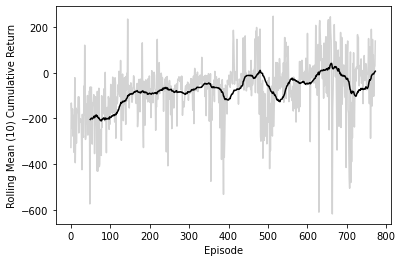

In [15]:
df = pd.DataFrame(history.history)
ax = df['episode_reward'].plot(color = 'lightgray')
df['episode_reward'].rolling(50).mean().plot(color = 'black')
ax.set_xlabel("Episode")
plt.ylabel("Rolling Mean (10) Cumulative Return")
plt.show()

In [17]:
df.to_csv('training_weights')

In [20]:
import sys
import io
# Redirect stdout to capture test results
old_stdout = sys.stdout
sys.stdout = mystdout = io.StringIO()

In [21]:
dqn.test(env, nb_episodes=200, visualize=False)
env.close()

In [22]:
sys.stdout = old_stdout

results_text = mystdout.getvalue()

In [24]:
text_file = open("rewards_test.txt", "wt")
n = text_file.write(results_text)
text_file.close()

In [25]:
results_text

'Testing for 200 episodes ...\nEpisode 1: reward: -185.719, steps: 121\nEpisode 2: reward: -58.025, steps: 1000\nEpisode 3: reward: -30.674, steps: 1000\nEpisode 4: reward: -32.171, steps: 1000\nEpisode 5: reward: -57.308, steps: 1000\nEpisode 6: reward: -193.346, steps: 116\nEpisode 7: reward: -22.976, steps: 1000\nEpisode 8: reward: -112.443, steps: 196\nEpisode 9: reward: -129.385, steps: 414\nEpisode 10: reward: -42.827, steps: 1000\nEpisode 11: reward: -17.041, steps: 1000\nEpisode 12: reward: -125.334, steps: 229\nEpisode 13: reward: -55.529, steps: 1000\nEpisode 14: reward: -31.111, steps: 1000\nEpisode 15: reward: -124.468, steps: 241\nEpisode 16: reward: -126.410, steps: 357\nEpisode 17: reward: -48.170, steps: 1000\nEpisode 18: reward: -43.405, steps: 1000\nEpisode 19: reward: -144.519, steps: 500\nEpisode 20: reward: -52.457, steps: 1000\nEpisode 21: reward: -64.565, steps: 1000\nEpisode 22: reward: -22.923, steps: 1000\nEpisode 23: reward: -68.159, steps: 1000\nEpisode 24: 